In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Vector field

Let us consider a vector field in $\mathbb{R}^2$, with a stationary point, e.g.:
$$F(x,y) = - \frac{x}{\sqrt{x^2 + y*2}}\mathbf{i} - \frac{y}{\sqrt{x^2 + y*2}}\mathbf{j}$$

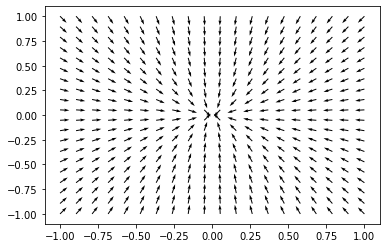

In [2]:
x,y = np.meshgrid(np.linspace(-1,1,20), np.linspace(-1,1,20))
u = -x / np.sqrt(x**2 + y**2)
v = -y / np.sqrt(x**2 + y**2)
plt.quiver(x,y,u,v)

## Discretization in space / on the domain

Let us assume that we discretize $\mathbb{R}^2$ in $1\times1$ squares and we compute the vector from the center of each square

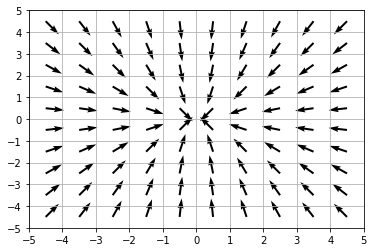

In [3]:
X,Y = np.meshgrid(np.arange(-4.5,5,1), np.arange(-4.5,5,1))
u = -X / np.sqrt(X**2 + Y**2)
v = -Y / np.sqrt(X**2 + Y**2)
plt.quiver(X,Y,u,v)

plt.xticks(np.arange(-5, 6, 1))
plt.yticks(np.arange(-5, 6, 1))
plt.grid()

This is now our **gridworld** with an associatated **underlying continuous policy** that converge to the goal state represented by the **stationary point**.

## Discretization of the vectors

Let us now discretize the vectors, too, allowing them to be either orthogonal to the axes or rotated by $\frac{\pi}{4}$.

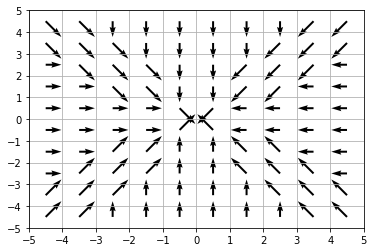

In [8]:
U = np.round(u)
V = np.round(v)
plt.quiver(X,Y,U,V)

plt.xticks(np.arange(-5, 6, 1))
plt.yticks(np.arange(-5, 6, 1))
plt.grid()

This is our **discrete policy** where actions are discrete steps.

## From a continuous vector field in continuos space to a discrete field of discrete probabilities 

We can also see every square as having a discrete probabily distribution over eight value (N, NE, E, SE, S, SW, W, NW) with all the mass concentrated on a single option. For instance, consider the vector rooted at $(0.5,1.5)$:

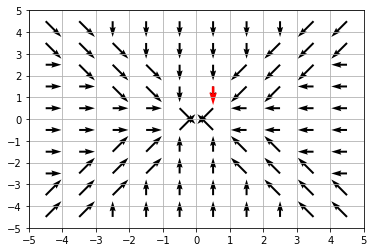

In [32]:
plt.quiver(X,Y,U,V)
plt.quiver(0.5,1.5,0,-1,color='red')

plt.xticks(np.arange(-5, 6, 1))
plt.yticks(np.arange(-5, 6, 1))
plt.grid()

We can represent this *action vector* as a sample from a probability distribution:

([<matplotlib.axis.XTick at 0x7fa5ae5ad190>,
 <a list of 8 Text xticklabel objects>)

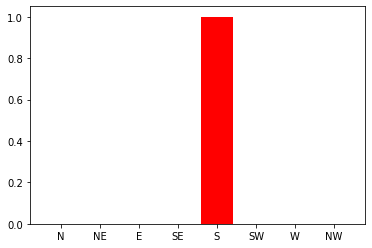

In [23]:
plt.bar(range(8), [0,0,0,0,1,0,0,0], color='red')
plt.xticks(range(8),labels=['N','NE','E','SE','S','SW','W','NW'])

## Reconstructing the field

Now suppose that you are given only a single trajectory from an arbitrary point to the solution in the field.

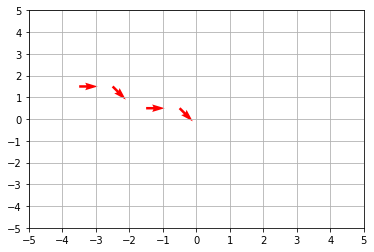

In [35]:
plt.quiver(-3.5,1.5,1,0,color='red')
plt.quiver(-2.5,1.5,1,-1,color='red')
plt.quiver(-1.5,0.5,1,0,color='red')
plt.quiver(-0.5,0.5,1,-1,color='red')

plt.xticks(np.arange(-5, 6, 1))
plt.yticks(np.arange(-5, 6, 1))
plt.grid()

**If I select a square adjacent to the trajectory, does it make sense to duplicate an adjacent vector?**

For instance, if I am given the point $(-1.5,1.5)$ it makes sense to copy one of the two adjacent vectors, either the one in $(-2.5,1.5)$ or in $(-1.5,0.5)$.

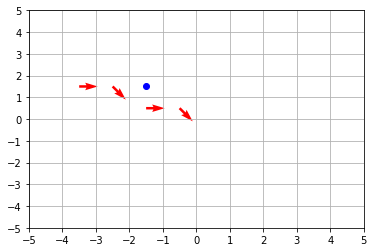

In [30]:
plt.quiver(-3.5,1.5,1,0,color='red')
plt.quiver(-2.5,1.5,1,-1,color='red')
plt.quiver(-1.5,0.5,1,0,color='red')
plt.quiver(-0.5,0.5,1,-1,color='red')
plt.scatter(-1.5,1.5,color='blue')

plt.xticks(np.arange(-5, 6, 1))
plt.yticks(np.arange(-5, 6, 1))
plt.grid()

But if I consider point $(0.5,0.5)$ copying the vector in $(-0.5,0.5)$ would probably be a bad choice.

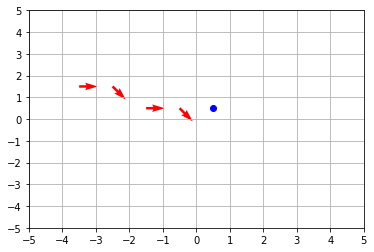

In [31]:
plt.quiver(-3.5,1.5,1,0,color='red')
plt.quiver(-2.5,1.5,1,-1,color='red')
plt.quiver(-1.5,0.5,1,0,color='red')
plt.quiver(-0.5,0.5,1,-1,color='red')
plt.scatter(0.5,0.5,color='blue')

plt.xticks(np.arange(-5, 6, 1))
plt.yticks(np.arange(-5, 6, 1))
plt.grid()

In the first case the copy is still a good approximation of the underlying vector field, but in the second it would not.